### Counting Ojects

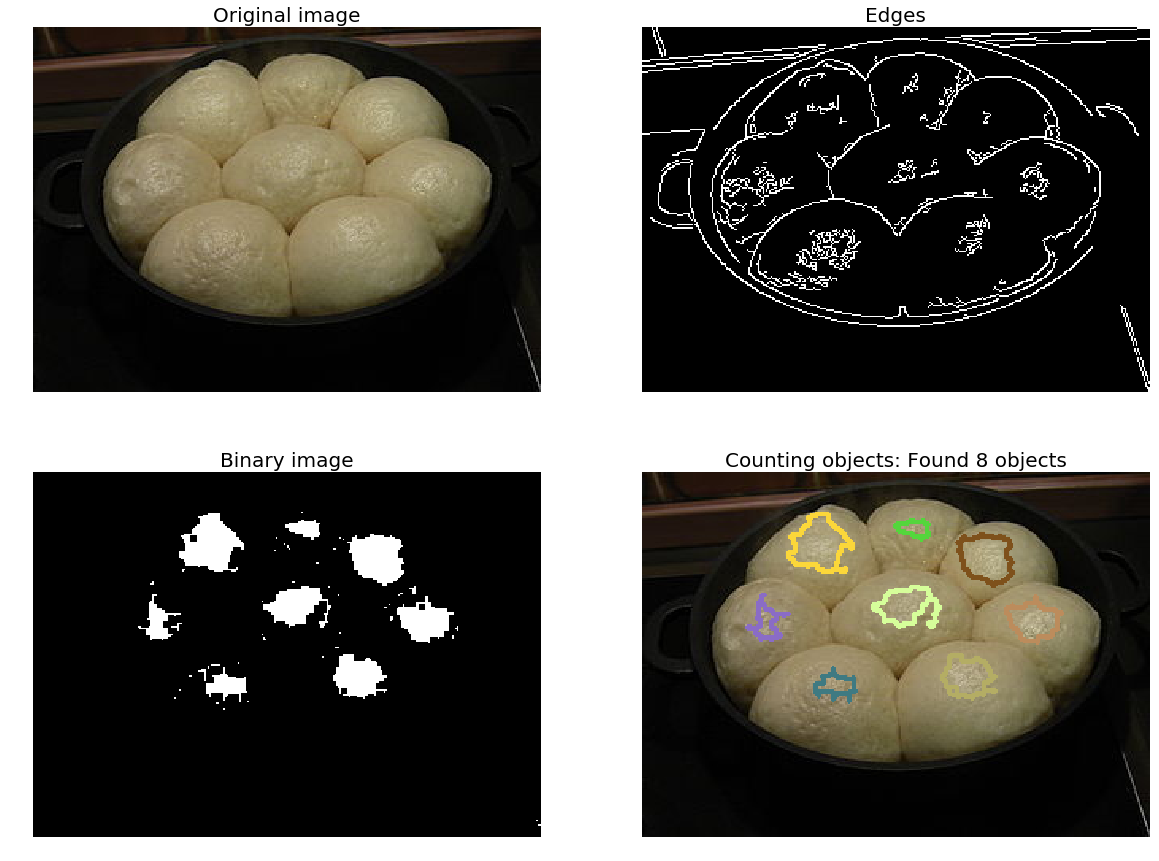

In [170]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('images/rasagolla.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray) #255 - gray
#gray = cv2.equalizeHist(gray)

edged = cv2.Canny(gray, 50, 150)
thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
kernel = np.ones((4,4),np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) #ERODE

#ret, thres = cv2.threshold(edged,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# find contours (i.e., outlines) of the foreground objects in the thresholded image
_, cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

count = 0
# loop over the contours
for c in cnts:
    # draw each contour on the output image with a 3px thick red
    # outline, then display the output contours one at a time
    if cv2.contourArea(c) > 5: # ignore small objects
        cv2.drawContours(output, [c], -1, (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)), 2)   
        count += 1
    
text = "Found {} objects".format(count)
plt.figure(figsize=(20,15))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(222), plt.imshow(edged, cmap='gray'), plt.axis('off'), plt.title('Edges', size=20)
plt.subplot(223), plt.imshow(thresh, cmap='gray'), plt.axis('off'), plt.title('Binary image', size=20)
plt.subplot(224), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Counting objects: ' + text, size=20)
plt.show()

### Morphological Pattern Matching with Hit-or-Miss Transform

(1046, 700) (34, 27) (34, 27)


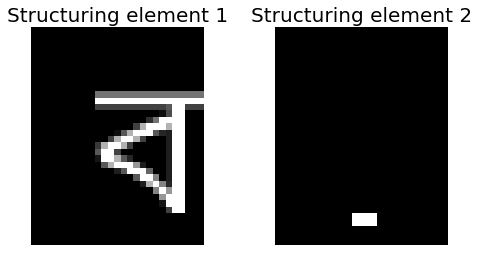

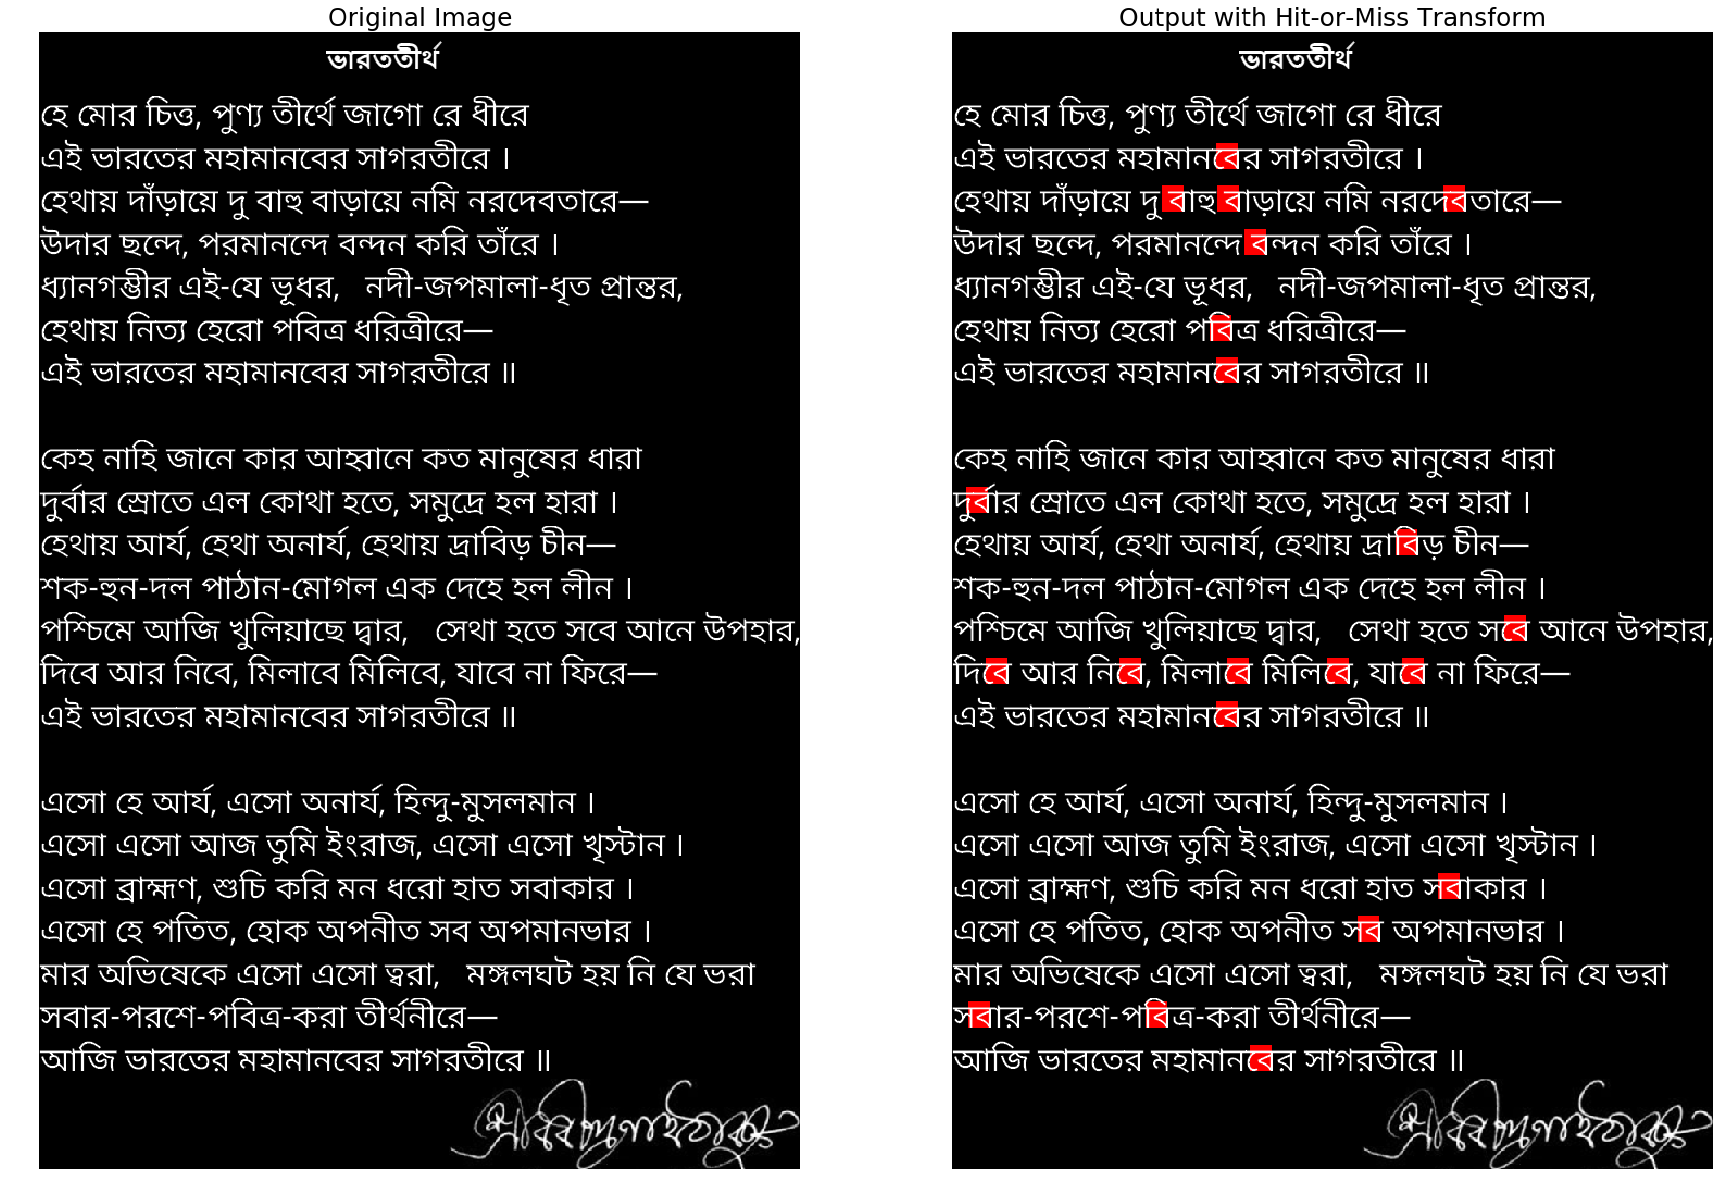

(1046, 700) (34, 27) (34, 27)


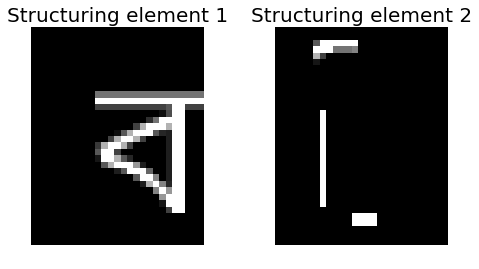

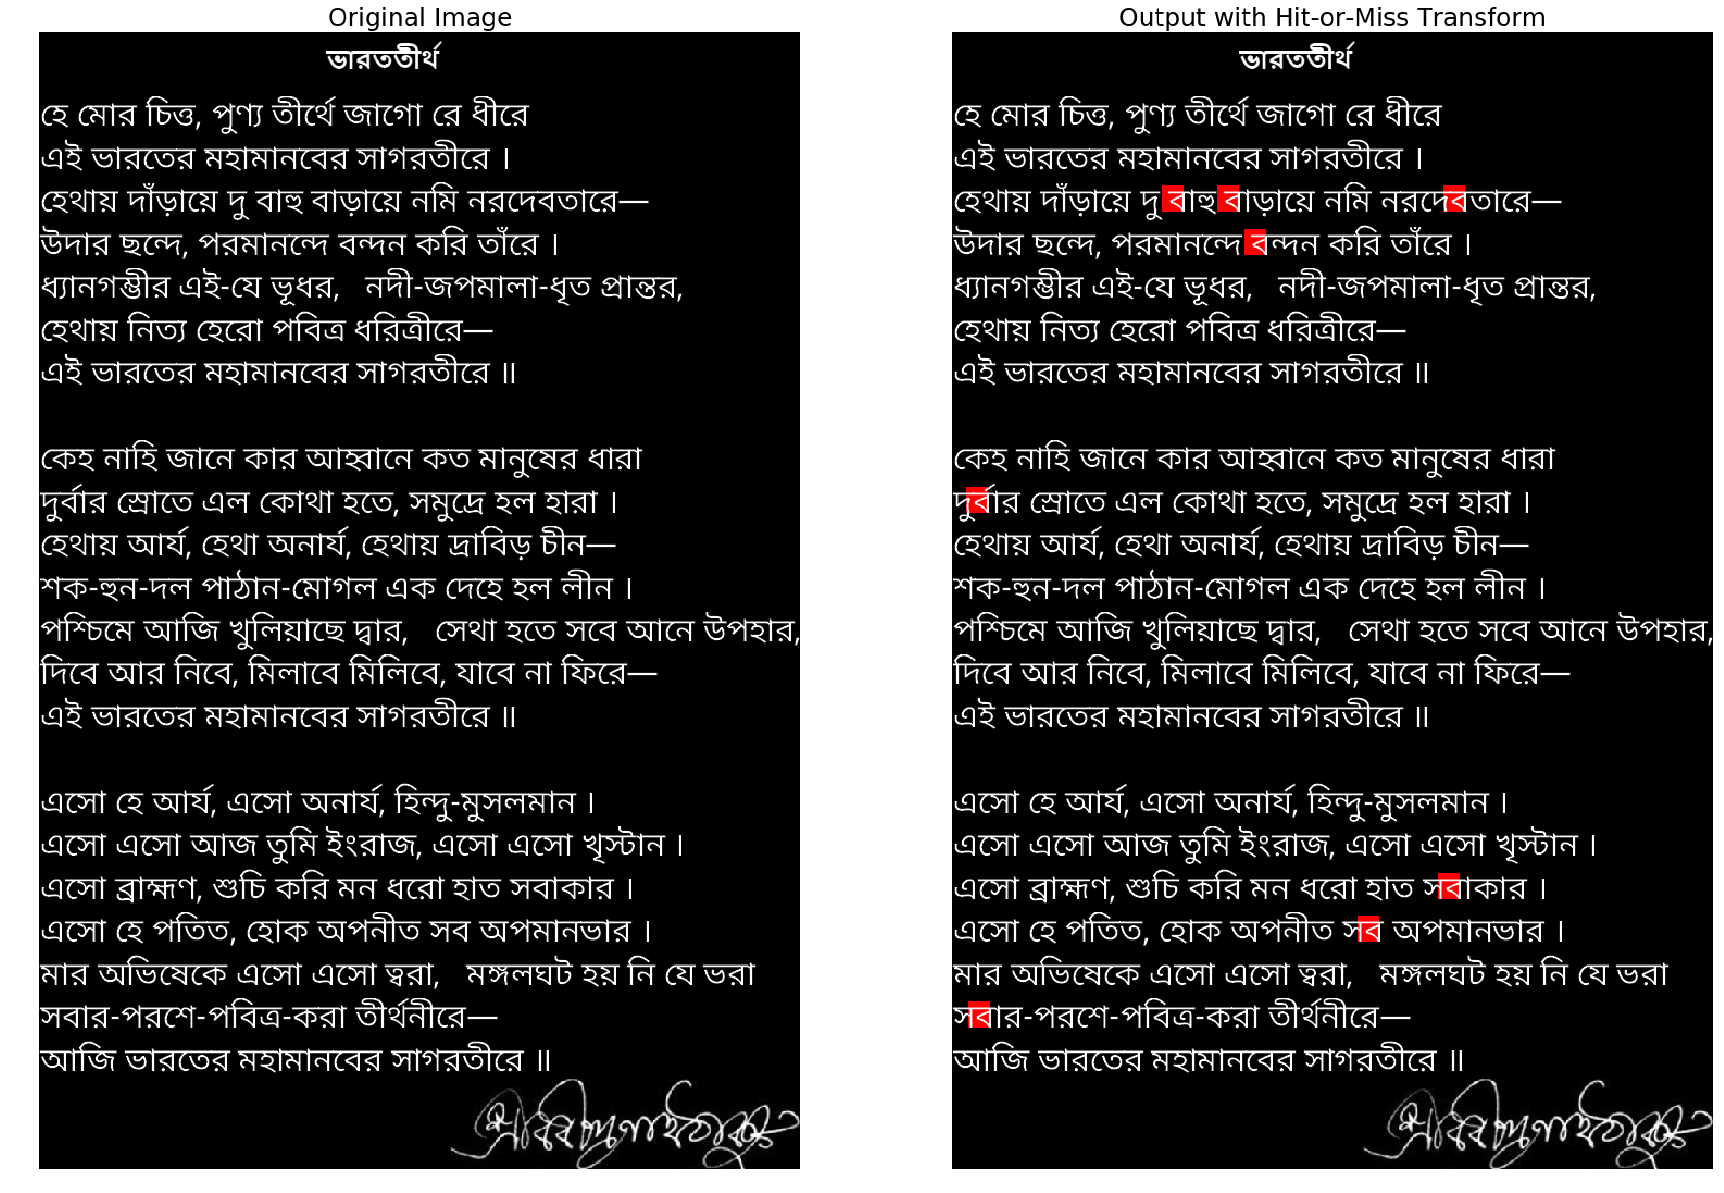

In [16]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from scipy import ndimage

def hit_or_miss_transform(im, s1, s2):
    im = rgb2gray(imread(im))
    m, n = im.shape
    s1 = rgb2gray(imread(s1))
    s2 = rgb2gray(imread(s2))
    print(im.shape, s1.shape, s2.shape)
    plt.gray()
    plt.figure(figsize=(8,4))
    plt.subplot(121), plt.imshow(s1), plt.axis('off'), plt.title('Structuring element 1', size=20)
    plt.subplot(122), plt.imshow(s2), plt.axis('off'), plt.title('Structuring element 2', size=20)
    plt.show()
    hom_transformed = ndimage.binary_hit_or_miss(im, structure1=s1, structure2=s2).astype(np.int)
    xs, ys = np.where(hom_transformed == 1)
    hom_transformed = gray2rgb(hom_transformed)
    w, h = 10, 12 #s1.shape
    #print(w,h,m,n)
    for i in range(len(xs)):
        x, y = (xs[i], ys[i])
        for j in range(max(0, x-h), min(m-1, x+h)):
            for k in range(max(0, y-w), min(n, y+w)):
                hom_transformed[j, k, 0] = 1.
        for j in range(max(0, x-h), min(m, x+h)):
            for k in range(max(0, y-w), min(n-1, y+w)):
                hom_transformed[j, k, 0] = 1.
    #np.max(hom_transformed)
    plt.figure(figsize=(30,60))
    #plt.imshow(hom_transformed.astype(np.float))
    plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Original Image', size=25)
    plt.subplot(122), plt.imshow(np.clip(gray2rgb(im) + hom_transformed.astype(np.float), 0, 1)), plt.axis('off'), 
    plt.title('Output with Hit-or-Miss Transform', size=25)
    plt.show()

hit_or_miss_transform('images/poem.png', 'images/bo.png', 'images/bo_inv_1.png') 
hit_or_miss_transform('images/poem.png', 'images/bo.png', 'images/bo_inv_2.png') 